<a href="https://colab.research.google.com/github/turjo997/Pattern-Recognition/blob/main/Assignment_Implentation_of_perceptron_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = "/content/drive/MyDrive/PatternRecognition/train-perceptron.txt"

In [ ]:
df = pd.read_csv(dir, sep=" " , header = None,dtype = 'Float64')
df.columns = ['X1','X2','Class_label']
print(df)

    X1   X2  Class_label
0  1.0  1.0          1.0
1  1.0 -1.0          1.0
2  2.0  2.5          2.0
3  0.0  2.0          2.0
4  2.0  3.0          2.0
5  4.0  5.0          1.0


In [ ]:
df.describe()

,X1,X2,Class_label
count,6.000000,6.000000,6.000000
mean,1.666667,2.083333,1.500000
std,1.366260,2.010390,0.547723
min,0.000000,-1.000000,1.000000
25%,1.000000,1.250000,1.000000
50%,1.500000,2.250000,1.500000
75%,2.000000,2.875000,2.000000
max,4.000000,5.000000,2.000000


In [ ]:
df.isnull().sum()

X1             0
X2             0
Class_label    0
dtype: int64

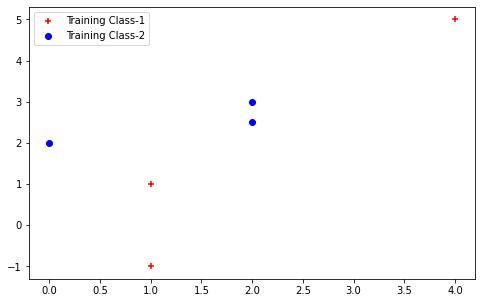

In [ ]:
Feature1 = np.array(df['X1'].copy())
Feature2 = np.array(df['X2'].copy())
level = np.array(df['Class_label'].copy())

class1X1 = []
class1X2 = []

class2X1 = []
class2X2 = []

for i in range(len(level)):

  if (level[i] == 1.0):
    class1X1.append(Feature1[i])
    class1X2.append(Feature2[i])
  else:
    class2X1.append(Feature1[i])
    class2X2.append(Feature2[i])

plt.figure(figsize=(8,5))
plt.scatter(class1X1, class1X2, c='red', label = 'Training Class-1', marker = '+')
plt.scatter(class2X1, class2X2, c='blue', label = 'Training Class-2', marker = 'o')
plt.legend(loc = 'upper left')
plt.show()


In [ ]:
print(class1X1)
print(class1X2)

[1.0, 1.0, 4.0]
[1.0, -1.0, 5.0]


In [ ]:
HD_Class1 = []
HD_Class2 = []


for i in range(len(class1X1)):
   HD_Class1.append([class1X1[i]**2 , class1X2[i]**2 , class1X1[i] * class1X2[i] , class1X1[i] , class1X2[i] , 1])

for i in range(len(class1X1)):
   HD_Class2.append([class2X1[i]**2 , class2X2[i]**2 , class2X1[i] * class2X2[i] , class2X1[i] , class2X2[i] , 1])   

HD_Class1 = np.array(HD_Class1)
HD_Class2 = np.array(HD_Class2)

In [ ]:
HD_Class2 *= -1
print(HD_Class2)

[[-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


In [ ]:
HD_Points = []
HD_Points = np.array(HD_Points)

HD_Points = np.concatenate((HD_Class1 , HD_Class2), axis=0)

print(HD_Points)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


In [ ]:
w = np.array([0,0,0,0,0,0])
print(np.multiply(HD_Points , w))

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0. -0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [-0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0.]]


In [ ]:
 for i,x_ith in enumerate(HD_Points):
   print(i , x_ith , np.dot(x_ith , w.T))

0 [1. 1. 1. 1. 1. 1.] 0.0
1 [ 1.  1. -1.  1. -1.  1.] 0.0
2 [16. 25. 20.  4.  5.  1.] 0.0
3 [-4.   -6.25 -5.   -2.   -2.5  -1.  ] 0.0
4 [-0. -4. -0. -0. -2. -1.] 0.0
5 [-4. -9. -6. -2. -3. -1.] 0.0


In [ ]:
def step_func(z):
  return 0.0 if z > 0.0 else 1.0

def one_at_a_time(Data_Points , weightVector , lr , epoch):
  
  features = Data_Points.shape[0]
  NoOfUpdates = 0
  NoOfIterations = 0  
    
  for i in range(epoch):
    Classification = np.zeros((features , 1))

    for j , x_ith in enumerate(Data_Points):
      #Dot = int(np.dot(x_ith, weightVector.T))
      Classification[j] = step_func((np.dot(x_ith, weightVector.T)))
      wTy = Classification[j] * x_ith
      weightVector += lr * wTy

      NoOfUpdates  += 1 * (1 if sum(wTy) != 0 else 0)
   
    NoOfIterations += 1

    if sum(Classification) == 0:
        break
  return NoOfUpdates , NoOfIterations


def many_at_a_time(Data_Points , weightVector , lr , epoch):
  
  features = Data_Points.shape[0]  
  NoOfUpdates = 0
  NoOfIterations = 0
    
  for i in range(epoch):
    Classification = np.zeros((features , 1))

    for j , x_ith in enumerate(Data_Points):
      Dot = int(np.dot(x_ith, weightVector.T))
      Classification[j] = step_func(Dot)
      
    NoOfIterations += 1

    if sum(Classification) == 0:
      break
    else:
      wTy = sum(Classification * Data_Points)
      weightVector = weightVector+ lr * wTy

      NoOfUpdates = NoOfUpdates + 1 * (1 if sum(wTy) !=0 else 0)
  
  return NoOfUpdates , NoOfIterations 

In [ ]:
classification1 = np.zeros((6 , 1))
print(classification1[5])

classification2 = np.ones((6 , 1))
print(sum(classification2))

[0.]
[6.]


In [ ]:
weights = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
print(many_at_a_time(HD_Points , weights , 0.1 , 100))
weights = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
print(one_at_a_time(HD_Points , weights , 1.0 , 100))

(100, 100)
(184, 94)


In [ ]:
alpha = 0.1

lr = [i/10 for i in range(1,11)]

cols = int(HD_Points.shape[0])
WeightVec_Initially_Zero = np.zeros((1,cols))
WeightVec_Initially_One = np.ones((1,cols))

np.random.seed(10)
WeightVec_Initially_Random = np.random.rand(1,cols)
wT = 0

singleiteration1 = []
batchiteration1 = []

singleiteration2 = []
batchiteration2 = []

singleiteration3 = []
batchiteration3 = []

print('Intial All Weight Zero')
print('Alpha(Learning Rate)' , 'One At A Time Update  ' , 'One At A Time Iteration  ' , 'Many At A Time Update  ' , 'Many At A Time Iteartion')
for j in range(len(lr)):
  wT = WeightVec_Initially_Zero.copy()
  NumberOfUpdatesSingle , NumberOfIterationsSingle = one_at_a_time(HD_Points , wT , lr[j] , 300)
  NumberOfUpdatesBatch , NumberOfIterationsBatch = many_at_a_time(HD_Points , wT , lr[j] , 300)
  singleiteration1.extend([NumberOfIterationsSingle])
  batchiteration1.extend([NumberOfIterationsBatch])
  print(lr[j],'\t\t\t', NumberOfUpdatesSingle , '\t\t\t\t' , NumberOfIterationsSingle , '\t\t\t', NumberOfUpdatesBatch , '\t\t\t' , NumberOfIterationsBatch)
  WT = 0

print('\n\n')  

print('Intial All Weight One')
print('Alpha(Learning Rate)' , 'One At A Time Update  ' , 'One At A Time Iteration  ' , 'Many At A Time Update  ' , 'Many At A Time Iteartion')
for j in range(len(lr)):
  wT = WeightVec_Initially_One .copy()
  NumberOfUpdatesSingle , NumberOfIterationsSingle = one_at_a_time(HD_Points , wT , lr[j] , 300)
  NumberOfUpdatesBatch , NumberOfIterationsBatch = many_at_a_time(HD_Points , wT , lr[j] , 300)

  singleiteration2.extend([NumberOfIterationsSingle])
  batchiteration2.extend([NumberOfIterationsBatch])

  WT = 0

  print(lr[j],'\t\t\t', NumberOfUpdatesSingle , '\t\t\t\t' , NumberOfIterationsSingle , '\t\t\t', NumberOfUpdatesBatch , '\t\t\t' , NumberOfIterationsBatch)


print('\n\n') 
print('Intial All Weight Random')
print('Alpha(Learning Rate)' , 'One At A Time Update  ' , 'One At A Time Iteration  ' , 'Many At A Time Update  ' , 'Many At A Time Iteartion')
for j in range(len(lr)):
  wT = WeightVec_Initially_Random .copy()
  NumberOfUpdatesSingle , NumberOfIterationsSingle = one_at_a_time(HD_Points , wT , lr[j] , 300)
  NumberOfUpdatesBatch , NumberOfIterationsBatch = many_at_a_time(HD_Points , wT , lr[j] , 300)

  singleiteration3.extend([NumberOfIterationsSingle])
  batchiteration3.extend([NumberOfIterationsBatch])

  WT = 0

  print(lr[j],'\t\t\t', NumberOfUpdatesSingle , '\t\t\t\t' , NumberOfIterationsSingle , '\t\t\t', NumberOfUpdatesBatch , '\t\t\t' , NumberOfIterationsBatch)

Intial All Weight Zero
Alpha(Learning Rate) One At A Time Update   One At A Time Iteration   Many At A Time Update   Many At A Time Iteartion
0.1 			 184 				 94 			 128 			 129
0.2 			 184 				 94 			 58 			 59
0.3 			 184 				 94 			 40 			 41
0.4 			 184 				 94 			 26 			 27
0.5 			 184 				 94 			 26 			 27
0.6 			 184 				 94 			 26 			 27
0.7 			 184 				 94 			 0 			 1
0.8 			 184 				 94 			 0 			 1
0.9 			 184 				 94 			 0 			 1
1.0 			 184 				 94 			 0 			 1



Intial All Weight One
Alpha(Learning Rate) One At A Time Update   One At A Time Iteration   Many At A Time Update   Many At A Time Iteartion
0.1 			 13 				 6 			 141 			 142
0.2 			 179 				 92 			 58 			 59
0.3 			 199 				 104 			 20 			 21
0.4 			 202 				 106 			 20 			 21
0.5 			 182 				 93 			 26 			 27
0.6 			 180 				 93 			 26 			 27
0.7 			 203 				 108 			 0 			 1
0.8 			 215 				 115 			 0 			 1
0.9 			 183 				 94 			 0 			 1
1.0 			 183 				 94 			 0 			 1



Intial All Weight Random
Alpha(Learning R

In [ ]:
print(singleiteration1)
print(lr)

[94, 94, 94, 94, 94, 94, 94, 94, 94, 94]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


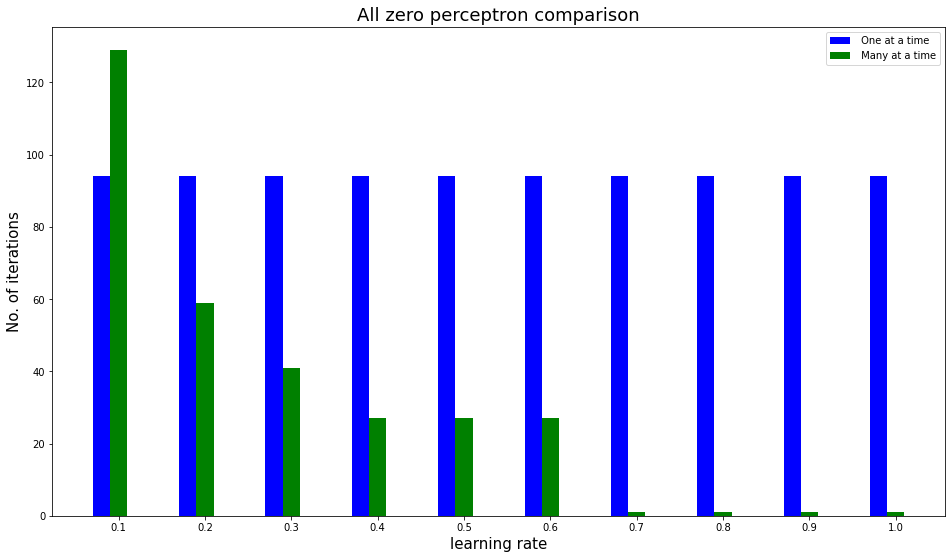

In [ ]:
plt.figure(figsize=(16,9))
 
classes_index = np.arange(len(lr))
 
width = 0.2
 
plt.bar(classes_index, singleiteration1, width , color = "b",
        label =" One at a time") #visible=False
 
plt.bar(classes_index + width, batchiteration1, width , color = "g",
        label =" Many at a time") 

plt.xticks(classes_index + width, lr)

plt.title("All zero perceptron comparison", fontsize = 18)
plt.xlabel("learning rate",fontsize = 15)
plt.ylabel("No. of iterations", fontsize = 15)
plt.legend()
plt.show()

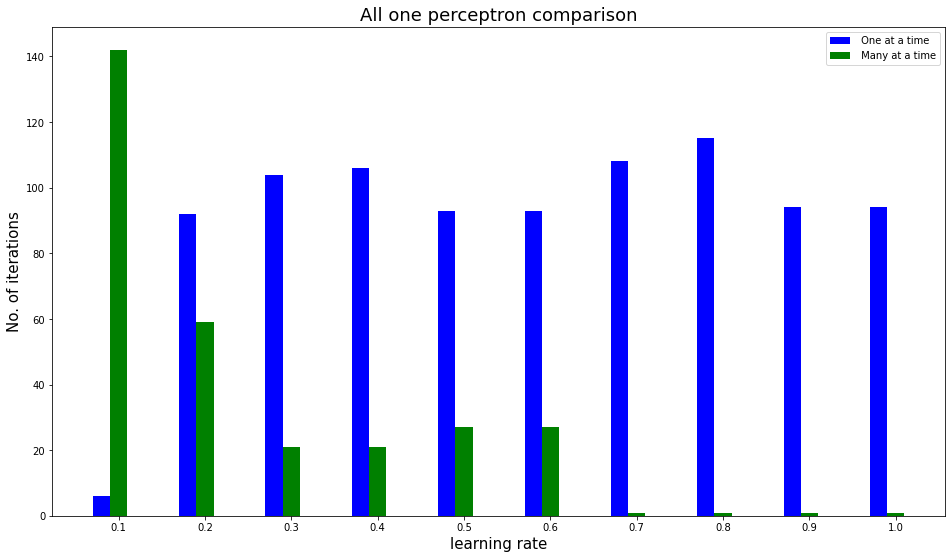

In [ ]:
plt.figure(figsize=(16,9))
 
classes_index = np.arange(len(lr))
 
width = 0.2
 
plt.bar(classes_index, singleiteration2, width , color = "b",
        label =" One at a time") #visible=False
 
plt.bar(classes_index + width, batchiteration2, width , color = "g",
        label =" Many at a time") 

plt.xticks(classes_index + width, lr)

plt.title("All one perceptron comparison", fontsize = 18)
plt.xlabel("learning rate",fontsize = 15)
plt.ylabel("No. of iterations", fontsize = 15)
plt.legend()
plt.show()

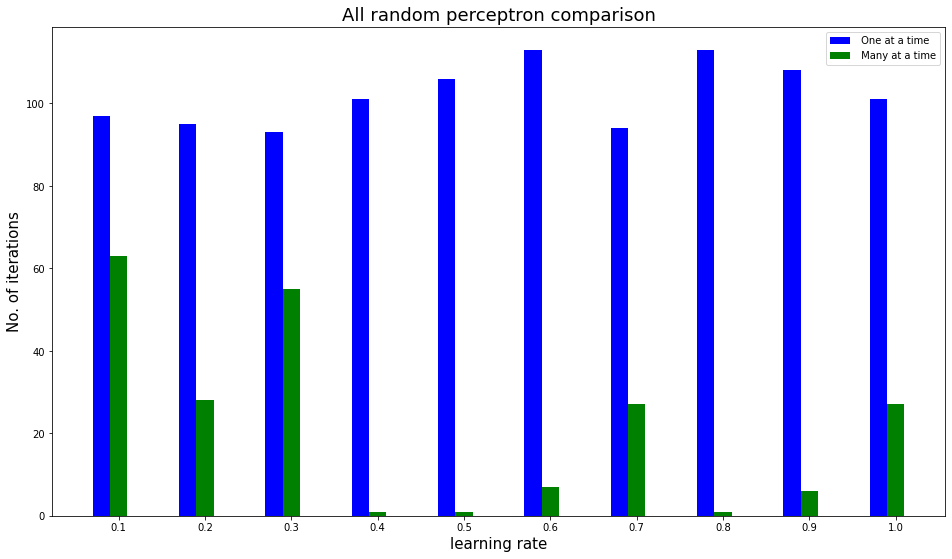

In [ ]:
plt.figure(figsize=(16,9))
 
classes_index = np.arange(len(lr))
 
width = 0.2
 
plt.bar(classes_index, singleiteration3, width , color = "b",
        label =" One at a time") #visible=False
 
plt.bar(classes_index + width, batchiteration3, width , color = "g",
        label =" Many at a time") 

plt.xticks(classes_index + width, lr)

plt.title("All random perceptron comparison", fontsize = 18)
plt.xlabel("learning rate",fontsize = 15)
plt.ylabel("No. of iterations", fontsize = 15)
plt.legend()
plt.show()